In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("Adult_dataset.csv")
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
45218,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
45219,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
45220,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K



Summary:
This analysis shows that individuals with higher education levels, such as Doctorate and Masters,
have a significantly higher percentage of income >50K compared to those with lower education levels.
For example, more than 50% of Doctorate holders earn above $50K, while only a small percentage
of those with education levels like 10th grade or 11th grade do.


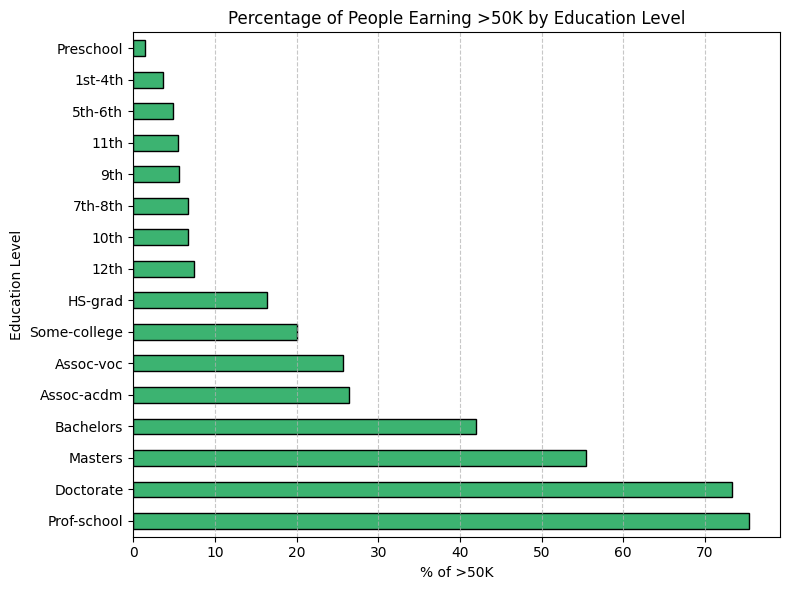

In [3]:
# Question 1
# Group by education and income, then count
education_income = data.groupby(['education', 'income']).size().unstack().fillna(0)

# Add total and % of >50K for clarity
education_income['Total'] = education_income.sum(axis=1)
education_income['>50K %'] = round((education_income['>50K'] / education_income['Total']) * 100, 2)

# Sort by highest percentage of >50K
education_income_sorted = education_income.sort_values('>50K %', ascending=False)

# Display final table
education_income_sorted[['<=50K', '>50K', '>50K %']]

print("\nSummary:")
print("This analysis shows that individuals with higher education levels, such as Doctorate and Masters,")
print("have a significantly higher percentage of income >50K compared to those with lower education levels.")
print("For example, more than 50% of Doctorate holders earn above $50K, while only a small percentage")
print("of those with education levels like 10th grade or 11th grade do.")

# Plot the percentage of >50K income by education level
education_income_sorted['>50K %'].plot(kind='barh', figsize=(8, 6), color='mediumseagreen', edgecolor='black')

plt.title('Percentage of People Earning >50K by Education Level')
plt.xlabel('% of >50K')
plt.ylabel('Education Level')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

income,<=50K,>50K,>50K %
workclass,,,
Self-emp-inc,734,912,55.41
Federal-gov,857,549,39.05
Local-gov,2185,915,29.52
Self-emp-not-inc,2737,1059,27.90
State-gov,1426,520,26.72
Private,26056,7251,21.77
Without-pay,19,2,9.52



Summary:
Individuals in Federal and Local government positions have relatively higher chances of earning >50K,
along with those who are self-employed (incorporated).
Private sector jobs are the most common, but have a lower proportion of high-income earners.


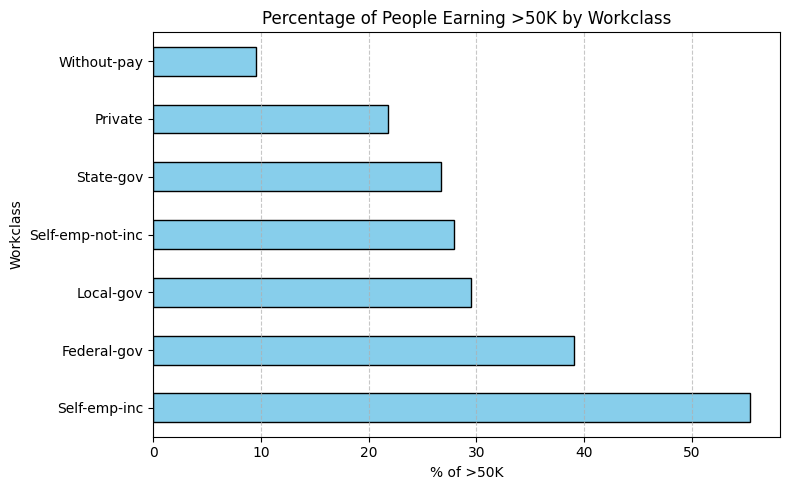

In [4]:
# Question 2 
# Group by workclass and income, then count
workclass_income = data.groupby(['workclass', 'income']).size().unstack().fillna(0)

# Add total and >50K percentage
workclass_income['Total'] = workclass_income.sum(axis=1)
workclass_income['>50K %'] = round((workclass_income['>50K'] / workclass_income['Total']) * 100, 2)

# Sort by highest >50K percentage
workclass_income_sorted = workclass_income.sort_values('>50K %', ascending=False)

# Display the key columns
display(workclass_income_sorted[['<=50K', '>50K', '>50K %']])

# Summary
print("\nSummary:")
print("Individuals in Federal and Local government positions have relatively higher chances of earning >50K,")
print("along with those who are self-employed (incorporated).")
print("Private sector jobs are the most common, but have a lower proportion of high-income earners.")

# Bar chart of high income percentage by workclass
workclass_income_sorted['>50K %'].plot(kind='barh', figsize=(8, 5), color='skyblue', edgecolor='black')
plt.title('Percentage of People Earning >50K by Workclass')
plt.xlabel('% of >50K')
plt.ylabel('Workclass')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


income
<=50K    36.75
>50K     44.01
Name: age, dtype: float64


Summary:
On average, individuals earning >50K are older (44.01 years) than those earning <=50K (36.75 years).
This suggests that age (and likely experience) may be correlated with higher income.


/var/folders/9d/zscm_24j68x2z794pyt37p480000gn/T/ipykernel_25246/1207257605.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([age_under_50k, age_over_50k], labels=['<=50K', '>50K'])


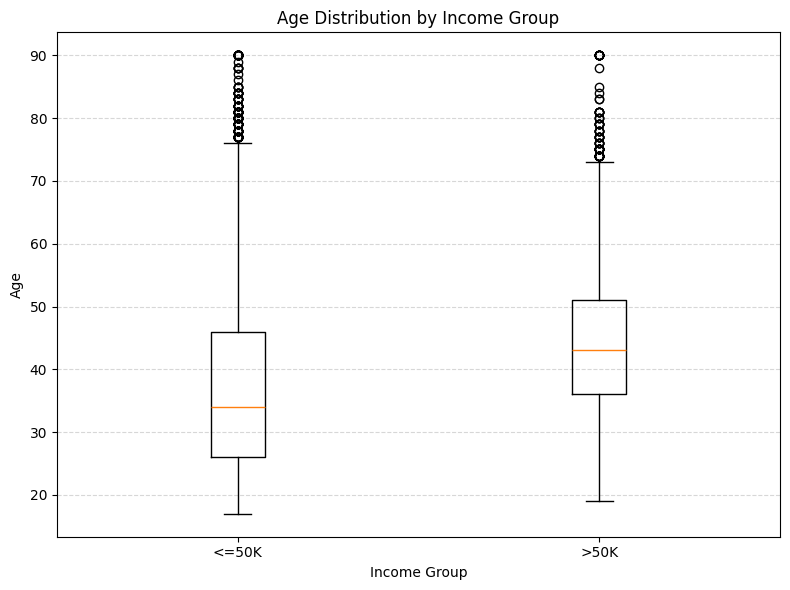

In [5]:
# Question 3
# Calculate average age grouped by income
avg_age_income = data.groupby('income')['age'].mean().round(2)

# Display the results
display(avg_age_income)

# Summary
print("\nSummary:")
print(f"On average, individuals earning >50K are older ({avg_age_income['>50K']} years) than those earning <=50K ({avg_age_income['<=50K']} years).")
print("This suggests that age (and likely experience) may be correlated with higher income.")

# Prepare age data by income group
age_under_50k = data[data['income'] == '<=50K']['age']
age_over_50k = data[data['income'] == '>50K']['age']

# Plot boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([age_under_50k, age_over_50k], labels=['<=50K', '>50K'])

plt.title('Age Distribution by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


income,<=50K,>50K,>50K %
marital-status,,,
Married-civ-spouse,11491,9564,45.42
Married-AF-spouse,18,14,43.75
Divorced,5642,655,10.40
Married-spouse-absent,498,54,9.78
Widowed,1156,121,9.48
Separated,1312,99,7.02
Never-married,13897,701,4.80



Summary:
Individuals who are 'Married-civ-spouse' have the highest proportion of income >50K.
Those who are separated, widowed, or never married tend to have lower chances of earning above $50K.


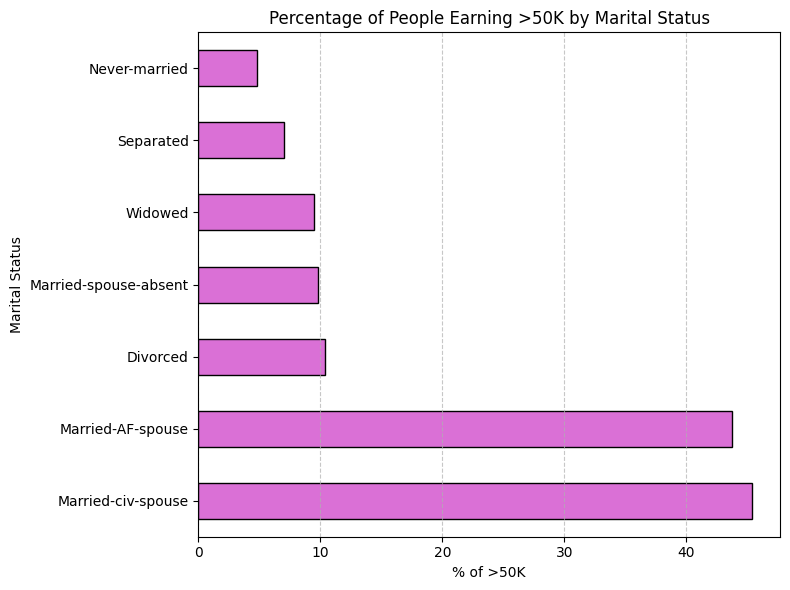

In [6]:
# Question 4 
# Group by marital-status and income, count the number of people in each category
marital_income = data.groupby(['marital-status', 'income']).size().unstack().fillna(0)

# Add totals and percentage of >50K
marital_income['Total'] = marital_income.sum(axis=1)
marital_income['>50K %'] = round((marital_income['>50K'] / marital_income['Total']) * 100, 2)

# Sort by percentage earning >50K
marital_income_sorted = marital_income.sort_values('>50K %', ascending=False)

# Display result
display(marital_income_sorted[['<=50K', '>50K', '>50K %']])

# Summary
print("\nSummary:")
print("Individuals who are 'Married-civ-spouse' have the highest proportion of income >50K.")
print("Those who are separated, widowed, or never married tend to have lower chances of earning above $50K.")

# Plot bar chart of % earning >50K by marital status
marital_income_sorted['>50K %'].plot(kind='barh', figsize=(8, 6), color='orchid', edgecolor='black')

plt.title('Percentage of People Earning >50K by Marital Status')
plt.xlabel('% of >50K')
plt.ylabel('Marital Status')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,34014.0,149.02,927.45,0.0,0.0,0.0,0.0,41310.0
>50K,11208.0,3991.79,14616.54,0.0,0.0,0.0,0.0,99999.0



Summary:
Individuals earning >50K have a much higher mean and median capital gain.
This suggests a strong relationship between investment income (capital gains) and total income.


/var/folders/9d/zscm_24j68x2z794pyt37p480000gn/T/ipykernel_25246/2122490906.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([gain_under_50k, gain_over_50k], labels=['<=50K', '>50K'])


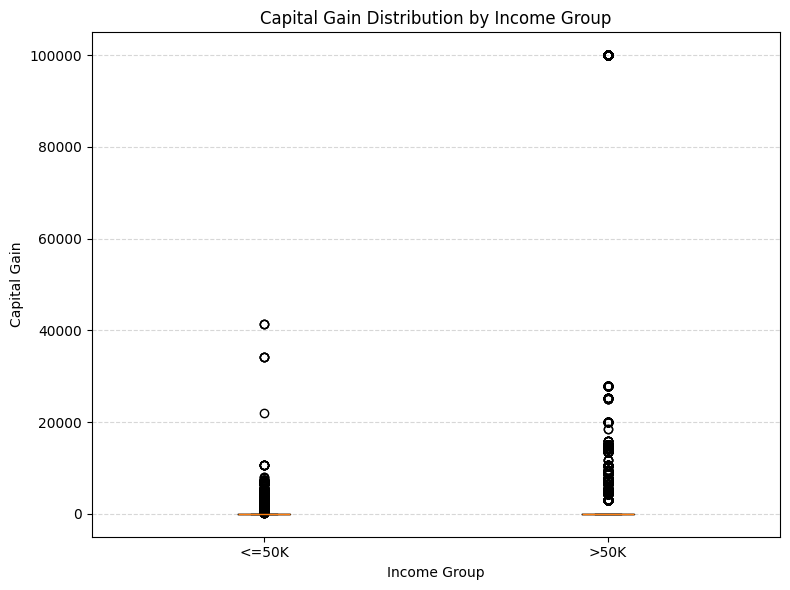

In [7]:
# Question 5 
# Get descriptive stats of capital-gain by income group
capital_gain_stats = data.groupby('income')['capital-gain'].describe().round(2)

# Display summary stats
display(capital_gain_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']])

# Summary
print("\nSummary:")
print("Individuals earning >50K have a much higher mean and median capital gain.")
print("This suggests a strong relationship between investment income (capital gains) and total income.")

# Prepare capital gain data by income group
gain_under_50k = data[data['income'] == '<=50K']['capital-gain']
gain_over_50k = data[data['income'] == '>50K']['capital-gain']

# Plot
plt.figure(figsize=(8, 6))
plt.boxplot([gain_under_50k, gain_over_50k], labels=['<=50K', '>50K'])

plt.title('Capital Gain Distribution by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Capital Gain')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

